In [1]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42)

In [3]:
train = pd.read_csv('data/train.csv')

In [4]:
train.head()

,ID,quarter,department,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,TRAIN_0000,Quarter1,sweing,Thursday,0.80,26.16,1108,0.27315,98,0,0,0,59,0.94073
1,TRAIN_0001,Quarter1,finishing,Thursday,0.75,3.94,1190,0.03704,0,0,0,0,8,0.88650
2,TRAIN_0002,Quarter1,sweing,Thursday,0.80,11.41,968,0.14120,50,0,0,0,30,0.80057
3,TRAIN_0003,Quarter1,sweing,Thursday,0.80,11.41,968,0.14120,50,0,0,0,30,0.80057
4,TRAIN_0004,Quarter1,sweing,Thursday,0.80,25.90,1170,0.07407,50,0,0,0,56,0.80038


In [5]:
print(train.isna().sum())

ID                       0
quarter                  0
department               0
day                      0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


In [6]:
test = pd.read_csv('data/test.csv')
test = test.drop(columns=['ID'])

In [7]:
X = train.drop(columns=['ID', 'actual_productivity'])
y = train['actual_productivity']

## pre-processing

In [8]:
# train_wip_mean = np.mean(X['wip'])
# X = X.replace({'wip':np.nan}, train_wip_mean)
# test = test.replace({'wip':np.nan}, train_wip_mean)

qual_col = ['quarter', 'department', 'day']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(X[i])
    X[i] = le.transform(X[i])
    
    for label in np.unique(test[i]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
            
    test[i] = le.transform(test[i])


print('Done.')

Done.


In [10]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

## Regression Model fit

In [9]:
def NMAE(y, pred):
    mae = mean_absolute_error(y, pred)
    score = mae / np.mean(np.abs(y))
    return score

In [11]:
cat = CatBoostRegressor().fit(X_tr, y_tr)
print('Done.')

Learning rate set to 0.04066
0:	learn: 0.1726188	total: 146ms	remaining: 2m 26s
1:	learn: 0.1703958	total: 152ms	remaining: 1m 15s
2:	learn: 0.1678575	total: 158ms	remaining: 52.4s
3:	learn: 0.1657603	total: 164ms	remaining: 40.8s
4:	learn: 0.1641761	total: 168ms	remaining: 33.4s
5:	learn: 0.1624269	total: 170ms	remaining: 28.2s
6:	learn: 0.1609908	total: 172ms	remaining: 24.4s
7:	learn: 0.1591891	total: 175ms	remaining: 21.7s
8:	learn: 0.1574094	total: 177ms	remaining: 19.5s
9:	learn: 0.1561974	total: 178ms	remaining: 17.6s
10:	learn: 0.1548246	total: 180ms	remaining: 16.2s
11:	learn: 0.1536380	total: 183ms	remaining: 15.1s
12:	learn: 0.1522149	total: 185ms	remaining: 14.1s
13:	learn: 0.1514699	total: 188ms	remaining: 13.2s
14:	learn: 0.1504017	total: 190ms	remaining: 12.4s
15:	learn: 0.1494495	total: 191ms	remaining: 11.7s
16:	learn: 0.1485563	total: 192ms	remaining: 11.1s
17:	learn: 0.1475318	total: 193ms	remaining: 10.5s
18:	learn: 0.1466578	total: 195ms	remaining: 10.1s
19:	learn:

In [ ]:
error = mean_absolute_error

In [16]:
# y_pred = cat.predict(y)

In [17]:
# error = NMAE(y, y_pred)
# error

TypeError: Singleton array 0.6321257375302973 cannot be considered a valid collection.

In [14]:
preds = cat.predict(test)
print('Done.')

Done.


## Submit

In [12]:
submit = pd.read_csv('data/sample_submission.csv')

submit

,ID,actual_productivity
0,TEST_0000,0.0
1,TEST_0001,0.0
2,TEST_0002,0.0
3,TEST_0003,0.0
4,TEST_0004,0.0
...,...,...
813,TEST_0813,0.0
814,TEST_0814,0.0
815,TEST_0815,0.0
816,TEST_0816,0.0


In [15]:
submit['actual_productivity'] = preds
submit

,ID,actual_productivity
0,TEST_0000,0.401034
1,TEST_0001,0.521032
2,TEST_0002,0.424930
3,TEST_0003,0.400632
4,TEST_0004,0.568387
...,...,...
813,TEST_0813,0.530550
814,TEST_0814,0.493892
815,TEST_0815,0.631133
816,TEST_0816,0.371851


In [18]:
y_pred = cat.predict(y_val)
mae = mean_absolute_error(y_val, preds)
print(mae)

KeyError: 0

In [15]:
features = X.columns

cat.feature_importances_.sum()

100.0

<AxesSubplot:>

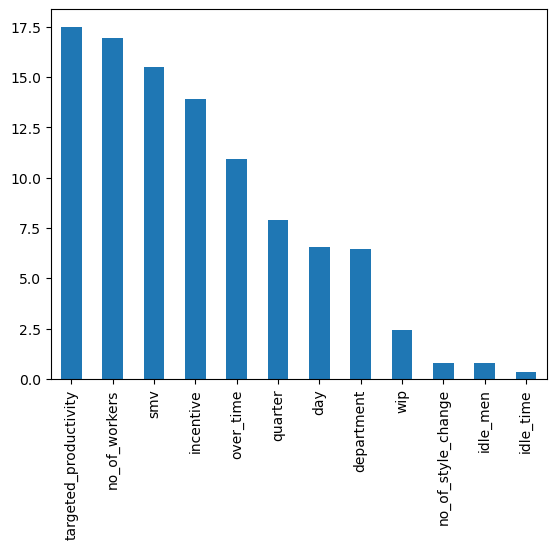

In [16]:
tmp_df = pd.Series(cat.feature_importances_,
                   index=features).sort_values(ascending=False)
tmp_df.plot.bar()

In [19]:
submit.to_csv('result/walaalla.csv', index=False)